In [1]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

# Graphique  pour les distances sur chaque textes

In [ ]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

calcul=["sim2-3","word"]
calc=calcul[0]
spacy_mod=["lg","sm","md"]
spc_mod=spacy_mod[0]
x=0.9
path_data =f"../small-ELTeC-fra_spaCy_Distances/*/*/*OCR/*/NER/SIM/{calc}*.json"

for path in glob.glob(path_data):
    # print(path)
    if spc_mod in path:
        autor=path.split("/")[3]
        if "_" in autor:
            autor=autor.split("_")[0]
        print(autor)
        version=path.split("/")[5]
        version=version.split("_")[-1]
        print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        print("vers_ren",vers_ren)
    #     
        distance=lire_fichier(path)
        # print(distance)

        if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
            version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
            print("Version : ", version)

        if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
            version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
            print("Version : ", version)
        if version=="Kraken-jspll-pretrain":
            version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
            print("Version : ", version)

        if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
            version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Kraken-jspll-ELTeC":
            version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
            print("Version : ", version)
        if  version=="Kraken-jspl-ELTeC":
            version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
            version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- _{vers_ren}",version)
            print("Version : ", version)

        if version=="tesseract" or version=="Tesseract-PNG":
             version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
             print("Version : ", version)
        if version=="TesseractPor-PNG":
            version=re.sub("TesseractPor-PNG","Tess. pt",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
            version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
            print("Version : ", version)
        if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
            version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
            print("Version : ", version)

        if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
            version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Tesseract-PNG-jspll-ELTeC":
            version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
            print("Version : ", version)
        if version =="TesseractPor-PNG-jspl-ELTeC":
            version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
            print("Version : ", version)

        if version == "tesseract0.3.10":
            version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
            print("version : ", version)

        if version == "kraken4.3.13.dev25":
            version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
            print("version : ", version)

        if version == "lectaurep-kraken4.3.13.dev25":
            version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
            print("version : ", version)

        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            # if key == "cosinus":
            if key == "cosinus":
                for r in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(version)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(r)
                    liste_version_ren.append(vers_ren)


tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
auteur_liste=set(tableau["Auteur"])
for i in auteur_liste:
    # print(i)
    data_tab1=data_tab.query('Auteur == @i ')
    display(data_tab1)
# # Load the example planets dataset
# # planets = sns.load_dataset("planets")
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

# Load the example planets dataset
# planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
        whis=[0, 1], width=.6, palette="vlag")#, legend=False)

# Add in points to show each observation
# sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
#               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab1,
          size=4, palette='dark:.3', linewidth=0)#, legend=False)

# Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])

#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
plt.savefig(f"../Boite-a_moustache/{}_ARCHEO-spaCy_ELTeC-fra_Distances_spaCy{spc_mod}_cosinus-{calc}.png",dpi=300, bbox_inches="tight")##NER


# Graphique boite à moustache pour les distances sur tous le corpus

OCR
camembert-4.41.1
version :  Kraken 4.3.13
OCR
flair-0.13.1
version :  Kraken 4.3.13
OCR
spacy-lg-3.7.5
version :  Kraken 4.3.13
OCR
spacy-md-3.7.5
version :  Kraken 4.3.13
OCR
spacy-sm-3.7.5
version :  Kraken 4.3.13
OCR
stanza-fr-1.8.2
version :  Kraken 4.3.13
OCR
camembert-4.41.1
version :  Kraken Lectp. 4.3.13
OCR
flair-0.13.1
version :  Kraken Lectp. 4.3.13
OCR
spacy-lg-3.7.5
version :  Kraken Lectp. 4.3.13
OCR
spacy-md-3.7.5
version :  Kraken Lectp. 4.3.13
OCR
spacy-sm-3.7.5
version :  Kraken Lectp. 4.3.13
OCR
stanza-fr-1.8.2
version :  Kraken Lectp. 4.3.13
OCR
camembert-4.41.1
version :  Tess. fr 3.10
OCR
flair-0.13.1
version :  Tess. fr 3.10
OCR
spacy-lg-3.7.5
version :  Tess. fr 3.10
OCR
spacy-md-3.7.5
version :  Tess. fr 3.10
OCR
spacy-sm-3.7.5
version :  Tess. fr 3.10
OCR
stanza-fr-1.8.2
version :  Tess. fr 3.10
OCR
camembert-4.41.1
version :  Kraken 4.3.13
OCR
flair-0.13.1
version :  Kraken 4.3.13
OCR
spacy-lg-3.7.5
version :  Kraken 4.3.13
OCR
spacy-md-3.7.5
version :  K

,Auteur,Configuration,Distance cosinus,Metric,REN
1175,OCR,Kraken 4.3.13,0.203843,cosinus,stanza-fr-1.8.2
509,OCR,Kraken 4.3.13,0.378857,cosinus,stanza-fr-1.8.2
1157,OCR,Kraken 4.3.13,0.148750,cosinus,stanza-fr-1.8.2
491,OCR,Kraken 4.3.13,0.258240,cosinus,stanza-fr-1.8.2
473,OCR,Kraken 4.3.13,0.267877,cosinus,stanza-fr-1.8.2
...,...,...,...,...,...
467,OCR,Tess. fr 3.10,0.045290,cosinus,stanza-fr-1.8.2
521,OCR,Tess. fr 3.10,0.509886,cosinus,stanza-fr-1.8.2
1169,OCR,Tess. fr 3.10,0.294051,cosinus,stanza-fr-1.8.2
503,OCR,Tess. fr 3.10,0.042423,cosinus,stanza-fr-1.8.2


/tmp/ipykernel_14463/2512140409.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2512140409.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1174,OCR,Kraken 4.3.13,0.132291,cosinus,spacy-sm-3.7.5
508,OCR,Kraken 4.3.13,0.380690,cosinus,spacy-sm-3.7.5
1156,OCR,Kraken 4.3.13,0.427230,cosinus,spacy-sm-3.7.5
490,OCR,Kraken 4.3.13,0.343082,cosinus,spacy-sm-3.7.5
472,OCR,Kraken 4.3.13,0.286179,cosinus,spacy-sm-3.7.5
...,...,...,...,...,...
1204,OCR,Tess. fr 3.10,0.564309,cosinus,spacy-sm-3.7.5
466,OCR,Tess. fr 3.10,0.035551,cosinus,spacy-sm-3.7.5
520,OCR,Tess. fr 3.10,0.622223,cosinus,spacy-sm-3.7.5
1168,OCR,Tess. fr 3.10,0.158322,cosinus,spacy-sm-3.7.5


/tmp/ipykernel_14463/2512140409.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2512140409.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1173,OCR,Kraken 4.3.13,0.162118,cosinus,spacy-md-3.7.5
507,OCR,Kraken 4.3.13,0.429869,cosinus,spacy-md-3.7.5
1155,OCR,Kraken 4.3.13,0.414534,cosinus,spacy-md-3.7.5
471,OCR,Kraken 4.3.13,0.337749,cosinus,spacy-md-3.7.5
1191,OCR,Kraken 4.3.13,0.414331,cosinus,spacy-md-3.7.5
...,...,...,...,...,...
465,OCR,Tess. fr 3.10,0.046383,cosinus,spacy-md-3.7.5
1185,OCR,Tess. fr 3.10,0.042608,cosinus,spacy-md-3.7.5
519,OCR,Tess. fr 3.10,0.261395,cosinus,spacy-md-3.7.5
501,OCR,Tess. fr 3.10,0.043883,cosinus,spacy-md-3.7.5


/tmp/ipykernel_14463/2512140409.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2512140409.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1172,OCR,Kraken 4.3.13,0.174616,cosinus,spacy-lg-3.7.5
506,OCR,Kraken 4.3.13,0.446115,cosinus,spacy-lg-3.7.5
1154,OCR,Kraken 4.3.13,0.332287,cosinus,spacy-lg-3.7.5
488,OCR,Kraken 4.3.13,0.288135,cosinus,spacy-lg-3.7.5
1208,OCR,Kraken 4.3.13,0.282933,cosinus,spacy-lg-3.7.5
...,...,...,...,...,...
1202,OCR,Tess. fr 3.10,0.401455,cosinus,spacy-lg-3.7.5
1184,OCR,Tess. fr 3.10,0.037632,cosinus,spacy-lg-3.7.5
518,OCR,Tess. fr 3.10,0.296824,cosinus,spacy-lg-3.7.5
1166,OCR,Tess. fr 3.10,0.007275,cosinus,spacy-lg-3.7.5


/tmp/ipykernel_14463/2512140409.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2512140409.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
0,OCR,Kraken 4.3.13,0.095628,cosinus,camembert-4.41.1
1170,OCR,Kraken 4.3.13,0.227762,cosinus,camembert-4.41.1
504,OCR,Kraken 4.3.13,0.528413,cosinus,camembert-4.41.1
1152,OCR,Kraken 4.3.13,0.166884,cosinus,camembert-4.41.1
1206,OCR,Kraken 4.3.13,0.271927,cosinus,camembert-4.41.1
...,...,...,...,...,...
1200,OCR,Tess. fr 3.10,0.425219,cosinus,camembert-4.41.1
1182,OCR,Tess. fr 3.10,0.207726,cosinus,camembert-4.41.1
516,OCR,Tess. fr 3.10,0.512867,cosinus,camembert-4.41.1
1164,OCR,Tess. fr 3.10,0.078242,cosinus,camembert-4.41.1


/tmp/ipykernel_14463/2512140409.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2512140409.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1171,OCR,Kraken 4.3.13,0.103689,cosinus,flair-0.13.1
505,OCR,Kraken 4.3.13,0.354239,cosinus,flair-0.13.1
1153,OCR,Kraken 4.3.13,0.101908,cosinus,flair-0.13.1
1207,OCR,Kraken 4.3.13,0.168488,cosinus,flair-0.13.1
469,OCR,Kraken 4.3.13,0.227561,cosinus,flair-0.13.1
...,...,...,...,...,...
1183,OCR,Tess. fr 3.10,0.023817,cosinus,flair-0.13.1
517,OCR,Tess. fr 3.10,0.318701,cosinus,flair-0.13.1
1165,OCR,Tess. fr 3.10,0.022323,cosinus,flair-0.13.1
337,OCR,Tess. fr 3.10,0.011863,cosinus,flair-0.13.1


/tmp/ipykernel_14463/2512140409.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2512140409.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


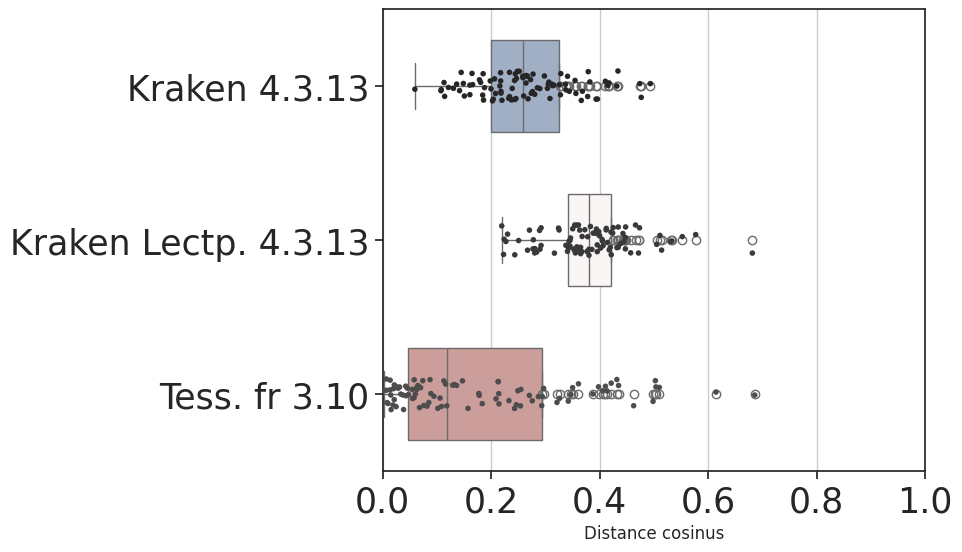

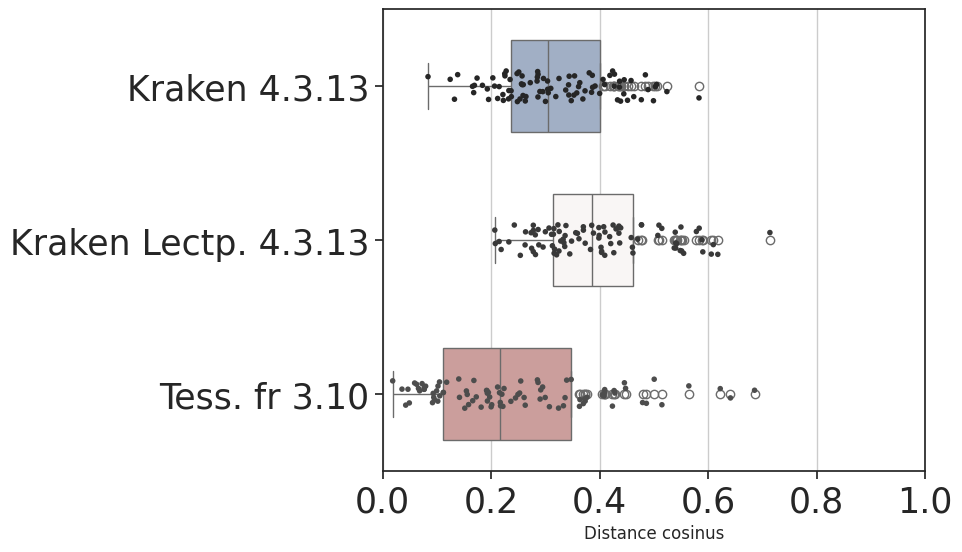

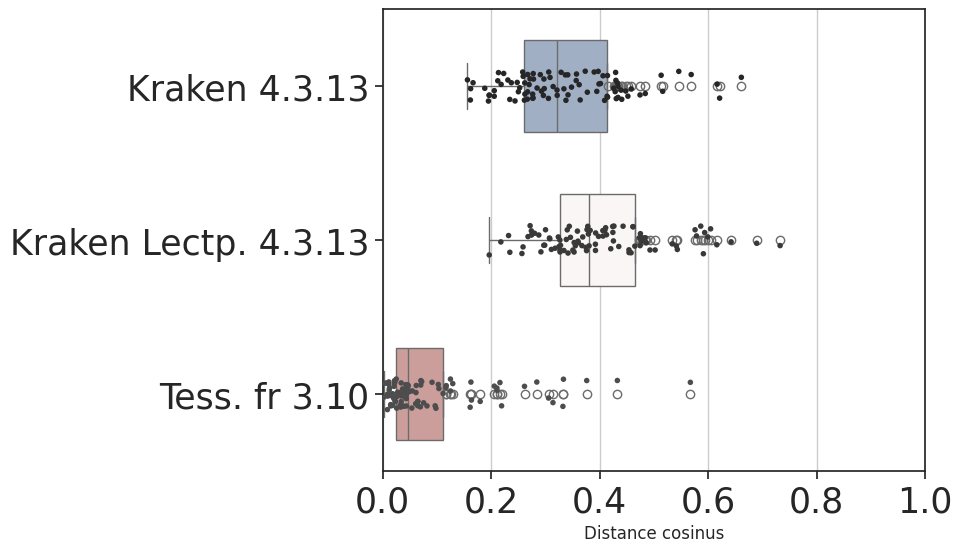

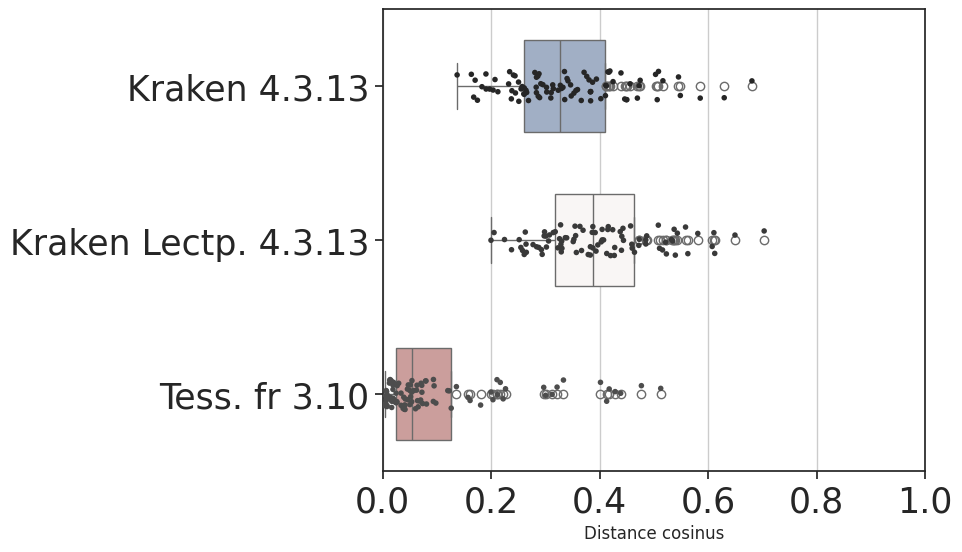

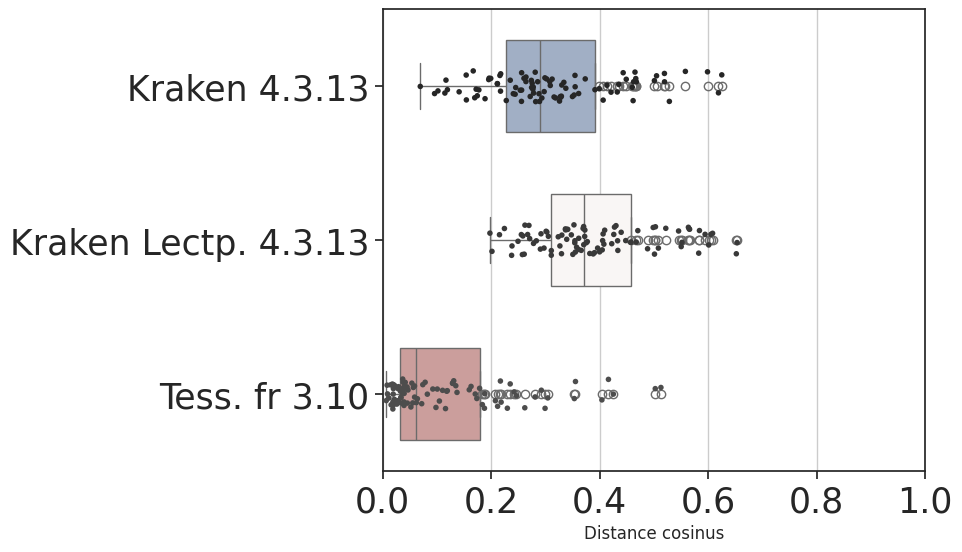

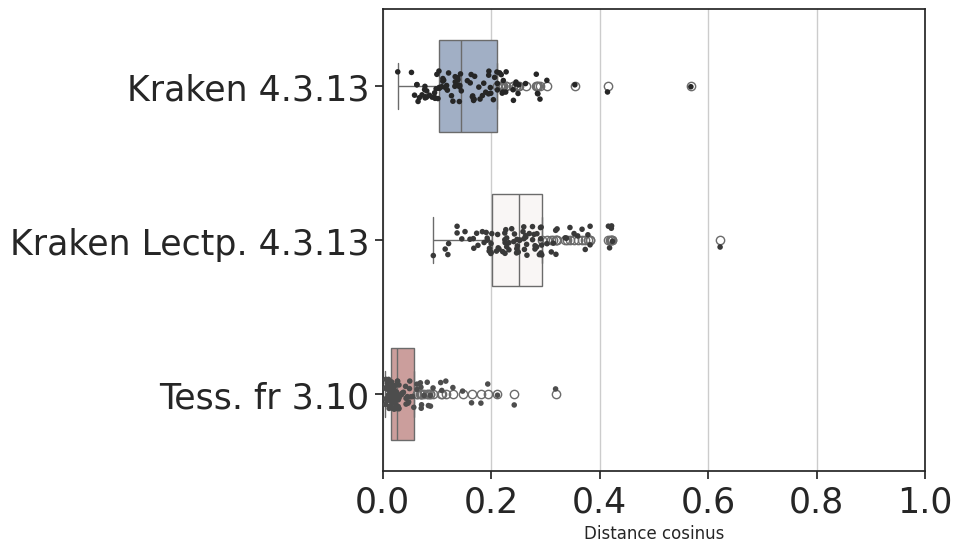

In [57]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]



calcul=["sim2-3","word"]
calc=calcul[0]
liste_cle=["cosinus","jaccard"]
cle=liste_cle[0]
spacy_mod=["-lg","-sm","-md"]
spc_mod=spacy_mod[0]
x=1

# path_data = f"../{version_doc}_Distances/*/*OCR/*/SIM/{calc}*.json"## Text
path_data =f"../ELTeC-fra*/*/*OCR/*/NER/SIM/{calc}*.json"## NER

for path in glob.glob(path_data):
    # print(path)
    corpus=path.split("/")[1]
    # print(corpus)
    # if spc_mod in path:

    autor=path.split("/")[3]
    autor=autor.split("_")[0]
    print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    # print(version)
    vers_ren=path.split("_")[-1].split("-liste.json")[0]
    print(vers_ren)

    distance=lire_fichier(path)
    # print(distance)

#_______________ARCHEOLOGIE DE SPACY _____________________________________________________
        # if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        #     version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
        #     print("Version : ", version)
        #     
        # if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
        #     version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- {vers_ren}",version)
        #     print("Version : ", version)
#_______________ARCHEOLOGIE DE SPACY _____________________________________________________
        
        
    if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken",version)
        print("Version : ", version)

    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="Kraken-jspll-pretrain":
        version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
        print("Version : ", version)

    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Kraken-jspll-ELTeC":
        version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
        print("Version : ", version)
    if  version=="Kraken-jspl-ELTeC":
        version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr",version)
        print("Version : ", version)

    if version=="tesseract" or version=="Tesseract-PNG":
         version=re.sub("tesseract|Tesseract-PNG","Tess.",version)###ATTENTION à LA LANGUE
         print("Version : ", version)
        
    if version=="TesseractPor-PNG":
        version=re.sub("TesseractPor-PNG","Tess. pt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
        
    if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
        version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Tesseract-PNG-jspll-ELTeC":
        version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
        print("Version : ", version)
    if version =="TesseractPor-PNG-jspl-ELTeC":
        version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
        print("Version : ", version)

    if version == "tesseract0.3.10":
        version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
        print("version : ", version)
    
    if version == "tesseract0.3.10-jspll-pretrain":
        version = re.sub("tesseract0.3.10-jspll-pretrain", "Tess. fr 3.10 -- jspl-fr", version)
        print("version : ", version)
    
    if version == "tesseract0.3.10-jspll-ELTeC":
        version = re.sub("tesseract0.3.10-jspll-ELTeC", "Tess. fr 3.10 -- jspl-ELTeCfr", version)
        print("version : ", version)

    if version == "kraken4.3.13.dev25":
        version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
        print("version : ", version)
    
    if version == "kraken4.3.13.dev25-jspll-pretrain":
        version = re.sub("kraken4.3.13.dev25-jspll-pretrain", "Kraken 4.3.13 -- jspl-fr", version)
        print("version : ", version)
    
    if version == "kraken4.3.13.dev25-jspll-ELTeC":
        version = re.sub("kraken4.3.13.dev25-jspll-ELTeC", "Kraken 4.3.13 -- jspl-ELTeCfr", version)
        print("version : ", version)

    if version == "lectaurep-kraken4.3.13.dev25":
        version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
        print("version : ", version)
    
    if version == "lectaurep-kraken4.3.13.dev25-jspll-pretrain":
        version = re.sub("lectaurep-kraken4.3.13.dev25-jspll-pretrain", "Kraken Lectp. 4.3.13 -- jspl-fr", version)
        print("version : ", version)
    
    if version == "lectaurep-kraken4.3.13.dev25-jspll-ELTeC":
        version = re.sub("lectaurep-kraken4.3.13.dev25-jspll-ELTeC", "Kraken Lectp. 4.3.13 -- jspl-ELTeCfr", version)
        print("version : ", version)

    # liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == cle:
        # if key == "jaccard":
            for r in res_dist:
                liste_name_metric.append(key)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                liste_dist.append(r)
                liste_version_ren.append(vers_ren)


tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau[f"Distance {cle}"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)

REN_liste=set(tableau["REN"])
for r in REN_liste:
    data_tab1=data_tab.query('REN == @r ')
    display(data_tab1)

    sns.set_theme(style="ticks")
    
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))
    ax.set_xscale("linear")
    
    # Load the example planets dataset
    # planets = sns.load_dataset("planets")
    
    # Plot the orbital period with horizontal boxes
    # sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #             whis=[0, 100], width=.6, palette="vlag")
    sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
            whis=[0, 1], width=.6, palette="vlag")#, legend=False)
    
    # Add in points to show each observation
    # sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #               size=4, color=".3", linewidth=0)
    sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,
              size=4, palette='dark:.3', linewidth=0)#, legend=False)
    
    # Tweak the visual presentation
    plt.tick_params(axis = 'both', labelsize = 25)
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    plt.xlim([0,x])
    
    #
    #
    # sns.despine(trim=True, left=True)
    # plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
    plt.savefig(f"../Boite-a_moustache/{corpus}_{r}_{cle}-{calc}.png",dpi=300, bbox_inches="tight")##NER

In [63]:
# !python --version

## Graphique distances cosinus et Jaccard

In [ ]:
tableau={}
liste_version_spacy=[]
liste_config=[]
liste_dist=[]
liste_auteur=[]
liste_name_metric=[]
liste_version_ren=[]

## Ajouter : a représenter spacy 3.7, 3.5.1 et 2.3.5 sur les mêmes graphiques, b 1 graph distance cosinus et 1 graph distance jaccard.

lt_version_doc=["small-ELTeC-fra_EVAL2","small-ELTeC-fra_spaCy3.5.1","small-ELTeC-fra_corr-automatique-spaCy3.5.1","small-ELTeC-fra_corr-automatique_spaCy-2.3.5","small-ELTeC-fra_corr-automatique-spaCy3.7.5", "ELTeC-fra_Complet"]
# lt_version_doc=["fra_spaCy3.5.1","eng_spaCy3.5.1","Por_spaCy3.5.1"]
version_doc=lt_version_doc[-2]
metriK=["cosinus","jaccard"]
metrK=metriK[1]
calcul=["sim2-3","word"]
calc=calcul[0]
x=1

# path_data = f"../{version_doc}_Distances/*/*OCR/*/SIM/{calc}*.json"## Text
path_data = f"../{version_doc}_Distances/*/*OCR/*/NER/SIM/{calc}*.json"## NER

for path in glob.glob(path_data):
    print(path)
    autor=path.split("/")[4]
    autor=autor.split("_")[0]
    # print(autor)
    version=path.split("/")[4]
    version=version.split("_")[-1]
    # print(version)
    vers_ren=path.split("_")[-1].split("-liste.json")[0]
    print("vers_ren",vers_ren)
    
    distance=lire_fichier(path)
    print(distance)

    if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
        version=re.sub("Kraken-base.txt|kraken|Kraken","Kraken",version)
        print("Version : ", version)

    if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
        version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
        print("Version : ", version)
    if version=="Kraken-jspll-pretrain":
        version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
        print("Version : ", version)

    if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
        version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Kraken-jspll-ELTeC":
        version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
        print("Version : ", version)
    if  version=="Kraken-jspl-ELTeC":
        version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
        version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png","Tess. fr",version)
        print("Version : ", version)

    if version=="tesseract" or version=="Tesseract-PNG":
         version=re.sub("tesseract|Tesseract-PNG","Tess.",version)
         print("Version : ", version)
    if version=="TesseractPor-PNG":
        version=re.sub("TesseractPor-PNG","Tess. pt",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
        version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
        print("Version : ", version)
    if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
        version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
        print("Version : ", version)

    if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
        version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
        print("Version : ", version)
    if  version=="Tesseract-PNG-jspll-ELTeC":
        version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
        print("Version : ", version)
    if version =="TesseractPor-PNG-jspl-ELTeC":
        version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
        print("Version : ", version)

    if version == "tesseract0.3.10":
        version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
        print("version : ", version)

    if version == "kraken4.3.13.dev25":
        version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
        print("version : ", version)

    if version == "lectaurep-kraken4.3.13.dev25":
        version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
        print("version : ", version)

    liste_distance=[]
    for key, res_dist in distance.items():
        # print("Key : ",key)
        if key == metrK:
            for r in res_dist:
            #     if paire =="spaCy_lg" and name_metric=="cosinus":#or paire=="sm--sm" or paire=="md--md":
                liste_name_metric.append(key)
                liste_config.append(version)#+"--"+paire)
                liste_auteur.append(autor)
                liste_dist.append(r)
                liste_version_ren.append(vers_ren)
#
#         # if key=="KL_res":
#         #     for k, v in res_dist.items():
#         #         if k=="Cosine Dist.":
#         #             print(v)
#         #             liste_name_metric.append(k)
#         #             # liste_version.append(version)
#         #             liste_config.append(version)#+"--"+paire)
#         #             liste_auteur.append(autor)
#         #             # liste_version_spacy.append(version_spacy)
#         #             liste_dist.append(v)

tableau["Auteur"]=liste_auteur
tableau["Configuration"]=liste_config
tableau["Distance"]=liste_dist
tableau["Metric"]=liste_name_metric
tableau["REN"]=liste_version_ren
data_tab = pd.DataFrame(tableau)
data_tab=data_tab.sort_values(by = 'Configuration')
# display(data_tab)

version_ren_set=set(liste_version_ren)
# # print(version_ren_set)
for i in version_ren_set:
    print(i)
    data_tab1=data_tab.query('REN == @i ')
    display(data_tab1)
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("linear")

    # Load the example planets dataset
    # planets = sns.load_dataset("planets")

    # Plot the orbital period with horizontal boxes
    # sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #             whis=[0, 100], width=.6, palette="vlag")
sns.boxplot(x="Distance",  y="Configuration", data=data_tab1,
            whis=[0, 1], width=.6, palette="vlag")#, legend=False)

    # Add in points to show each observation
    # sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
    #               size=4, color=".3", linewidth=0)
sns.stripplot(x="Distance", y="Configuration", data=data_tab1,
              size=4, palette='dark:.3', linewidth=0)#, legend=False)

    # Tweak the visual presentation
plt.tick_params(axis = 'both', labelsize = 25)
ax.xaxis.grid(True)
ax.set(ylabel="")
plt.xlim([0,x])
#
#
#
# sns.despine(trim=True, left=True)
# plt.savefig(f"../Boite-a_moustache/{version_doc}_{metrK}-{calc}.png",dpi=300, bbox_inches="tight")##Texte
    plt.savefig(f"../Boite-a_moustache/{version_doc}_{i}-{metrK}-{calc}.png",dpi=300, bbox_inches="tight")##NER